In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [50]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [52]:


batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/train',  # this is the target directory
        target_size=(256,256),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [53]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=20000 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=1000 // batch_size)

Epoch 1/15
625/625 [==============================] - 384s 614ms/step - loss: 1.1635 - accuracy: 0.5677 - val_loss: 0.6499 - val_accuracy: 0.5917
Epoch 2/15
625/625 [==============================] - 372s 595ms/step - loss: 0.6429 - accuracy: 0.6329 - val_loss: 0.6709 - val_accuracy: 0.5252
Epoch 3/15
625/625 [==============================] - 376s 601ms/step - loss: 0.5965 - accuracy: 0.6797 - val_loss: 0.6583 - val_accuracy: 0.6129
Epoch 4/15
625/625 [==============================] - 373s 597ms/step - loss: 0.5620 - accuracy: 0.7103 - val_loss: 0.7430 - val_accuracy: 0.6341
Epoch 5/15
625/625 [==============================] - 369s 590ms/step - loss: 0.5389 - accuracy: 0.7286 - val_loss: 0.4971 - val_accuracy: 0.7480
Epoch 6/15
625/625 [==============================] - 367s 587ms/step - loss: 0.5136 - accuracy: 0.7492 - val_loss: 0.5286 - val_accuracy: 0.7621
Epoch 7/15
625/625 [==============================] - 366s 585ms/step - loss: 0.5117 - accuracy: 0.7539 - val_loss: 0.7614 -

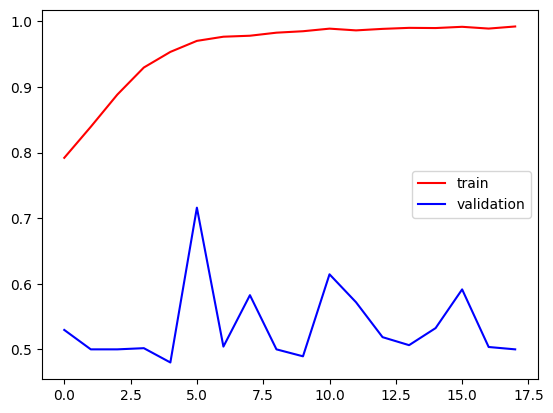

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
testImgPath="/content/test/dogs/dog.100.jpg"
testImg = cv2.imread(testImgPath)
print(testImg.shape)
print(plt.imshow(testImg))
testImg=cv2.resize(testImg,(256,256))
print(testImg.shape)

#1 means one image in this batch (1,256,256,3)
#256,256,3 means image size and channels in rgb
testInput=testImg.reshape(1,256,256,3)

In [ ]:
model.predict(testInput) #zero = cat, & one = dog